[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_3_Preprocesamiento/notebook/01Intro2PPwoAns.ipynb)

# Intro al Pre-procesamiento

<img src="http://tanukamandal.com/wp-content/uploads/2018/05/data-preparation-1-570x350.png" width="800" align="middle">

---



## Contenido de la Sesión


1.   Introducción al Pre-procesamiento de Datos
          1.1. Tipos de PP.
2.   Exploración Visual de los Datos
          2.1. Histogramas.
            2.1.1. Joyplot
          2.2. Diagramas de Dispersión.

### Literatura recomendada:

1. García, S., Luengo, J., & Herrera, F. (2015). Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

---

### Introducción al Pre-procesamiento (PP) de Datos.

El **preprocesamiento** de datos dentro de la Ciencia de Datos es FUNDAMENTAL. 

Según el Foro Económico Mundial, **¡para 2025 generaremos alrededor de 463 exabytes ($463*10^{18}$ bytes = 463 milliones de TB) de datos a nivel mundial por día!**. Entonces, deberiamos preguntarnos

*   ¿todos los datos son adecuados para ser utilizados por los algoritmos de aprendizaje automático?
*   ¿Cómo decidimos eso?

El **preprocesamiento** es el primer paso a realizarse antes de comenzar a aprender cualquier tipo de modelo, ya que la calidad de los datos y la información útil que puede derivarse de estos afectará directamente la capacidad de nuestros modelos.

>> **Garbage In, Garbage Out**

![](https://docs.google.com/uc?export=download&id=1U5EKW0k-YdYso4sid8SDVZIlCuLAIqVP)

<!-- ![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/525px-Data_visualization_process_v1.png) -->

Tomado de: https://www.kdnuggets.com/2016/03/data-science-process.html


---
### Entonces, ¿qué es el PP de datos?

Cuando hablamos de datos, generalmente pensamos en conjuntos de datos en **forma  tabular o tablas de excel** (filas y columnas) con valores que una computadora es capáz de asimilar (números continuos) y sin datos faltantes.  Por ejemplo, consideremos un conjunto de datos de aprobación crediticia.
Dicho conjunto consta de:

650 clientes (filas), 15 variables explicativas (nominales/categóricas y númericas) así como una clase (en total 16 columnas).

>> pregunta: **¿Una computadora puede analizar variables nominales?**

>> En el caso negativo, **¿cómo podriamos convertir la variable para que la computadora pueda interpretar dicha variable?**

>> **¿Qué se debe hacer cuando una variable presenta un dato faltante?**


In [123]:
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import data_table

url = 'https://raw.githubusercontent.com/MauricioRR-Tec/AprendizajeAutomatico/main/Tema_3_Preprocesamiento/data/CreditApproval/creditApproval_dataset.csv'
df = pd.read_csv(url)

#data_table.DataTable(df, include_index=True, num_rows_per_page=10)
#data_table.DataTable? #How to display help regarding a function

### ¿Cómo identificarían si una variable, por ejemplo **A4** tiene valores faltantes? Considere que las variables con datos faltantes estan marcadas con un '?'

In [135]:
a = df['A4'].unique()
a[0]

'u'

Lastima que Python no es R, de otra forma tendrian por defecto una función llamada *which()*

In [23]:
def which(self):
    try:
        self = list(iter(self))
    except TypeError as e:
        raise Exception("""'which' method can only be applied to iterables.
        {}""".format(str(e)))
    indices = [i for i, x in enumerate(self) if bool(x) == True]
    return(indices)

In [136]:
which(df.A4 == a[2])

[206, 270, 330, 456, 592, 622]

De esta forma, podemos hacer un *splicing* (partición) de toda la base, obteniendo solo aquellos renglones con los elementos de interes. 

In [37]:
ixes = which(df.A4 =='?')
df.iloc[ixes,:]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
206,a,71.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
270,b,37.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
330,b,20.42,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
456,b,34.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
592,b,23.17,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
622,a,25.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+


Bueno, bueno, pero el *splicing* de Python es bastante efectivo y más legible.

In [137]:
lugares = df.A4 == a[2]
df[lugares]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
206,a,71.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
270,b,37.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
330,b,20.42,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
456,b,34.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
592,b,23.17,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
622,a,25.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+


---
Si bien mucha información se encuentra en un formato tabular o algún otro compatible, no siempre es el caso. 
Los **datos pueden tener muchas formas diferentes: 
tablas estructuradas, imágenes, archivos de audio, videos, etc**.

Las máquinas no entienden los datos de texto, imagen o video **tal como son**, entienden los 1 y los 0. Por lo tanto, no es suficiente con hacer una presentación de diapositivas de todas nuestras imágenes y esperar que nuestro modelo de aprendizaje automático se entrene solo con eso.

![](https://imgs.xkcd.com/comics/machine_learning.png)

#### Por ejemplo, en el caso de una imagen correspondiente al dígito **6** escrito a mano

#### ¿Cómo podemos representarla para que una máquina entienda una imagen?

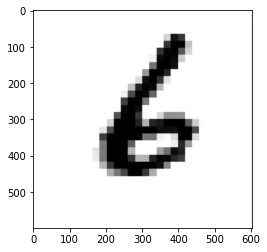

In [10]:
from matplotlib import image as img
from matplotlib import pyplot as plt

image = img.imread("https://i.stack.imgur.com/Ds5Rc.png")

plt.imshow(image)

Representamos la imagen en una matriz, o mejor dicho, varias matrices correspondientes a la escala de colores en Rojo, Verde y Azul (RGB por sus siglas en inglés). Por lo tanto, una imagen corresponde a 3 matrices $z_i\in Z$, de tamaño $m\times n$.

In [11]:
print(type(image)) #El objeto devuelto es un arreglo multidimensional MxNxD
print(image.shape) #Funciones de numpy.ndarray, devuelve el tamaño del arreglo.
print(image)

<class 'numpy.ndarray'>
(599, 602, 3)
[[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.9647059  0.9647059  0.9647059 ]
  [0.93333334 0.93333334 0.93333334]
  [0.8784314  0.8784314  0.8784314 ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.972549   0.972549   0.972549  ]
  [0.93333334 0.93333334 0.93333334]
  [0.8784314  0.8784314  0.8784314 ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.93333334 0.93333334 0.93333334]
  [0.88235295 0.88235295 0.88235295]]

 ...

 [[0.96862745 0.96862745 0.96862745]
  [0.9764706  0.9764706  0.9764706 ]
  [0.99215686 0.99215686 0.99215686]
  ...
  [1.         1.         1.        ]
  [0.9882353  0.9843137  0.9882353 ]
  [0.827451   0.827451   0.827451  ]]

 [[0.96862745 0.96862745 0.96862745]

---
### ¿Cuáles son los problemas básicos que deben resolverse en el PP de datos?

> En cualquier proceso de Machine Learning, **el PP es el paso en el que los datos se transforman o codifican** para llevarlos a un estado tal que ahora la máquina pueda analizarlos fácilmente. 

Estos son algunos de los tipos de problemas básicos así como la familia de técnicas de PP a la que pertenecen:
* ¿Cómo limpio los datos? ***Limpieza de datos***.
* ¿Cómo unifico y escalo los datos? ***Normalización de datos***.
* ¿Cómo proporciono datos precisos? ***Transformación de datos***.
* ¿Cómo manejo los datos faltantes? ***Imputación de datos perdidos***.
* ¿Cómo incorporo y ajusto datos? ***Integración de datos***.
* ¿Cómo detecto y manejo el ruido? ***Análisis del ruido***.

![](https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo)

---
#### a.1. Limpieza de Datos.

Involucra operaciones como
* **corrección** de datos 
* **filtrar datos** especificios o incorrectos 
* **reducir detalles** innecesarios. 

Es un concepto general que se traslapa con otras técnicas de PP como la imputación de datos faltantes y análisis del ruido (aunque ambas categorías se ven por separado para un análisis más profundo). 

Otras operaciones son 
* la **detección de discrepancias** y **datos sucios** (fragmentos de los datos originales que no tienen sentido). 

Esto típicamente requiere intervención humana ya que es necesaria la comprensión de los datos originales.

#### Ejemplo:

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

![](https://docs.google.com/uc?export=download&id=1SY3zCno1dL3qukcBjWz8xIa7gkfbqm7D)

<!-- <img src="https://docs.google.com/uc?export=download&id=1SY3zCno1dL3qukcBjWz8xIa7gkfbqm7D" width="800" align="middle"> -->


In [142]:
import pandas as pd
import matplotlib as plt
url = 'https://raw.githubusercontent.com/MauricioRR-Tec/AprendizajeAutomatico/main/Tema_3_Preprocesamiento/data/CreditApproval/creditApproval_dataset.csv'
df = pd.read_csv(url)
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


### Ejercicio:

1. Ahora queremos remover (por alguna razón) los registros de la matriz donde la variable A4 == 'u'

2. También podriamos querer acotarnos a un rango de valores, por ejemplo para la
variable 'A3' entre 4 y 10

3. En particular, queremos cambiar el valor de la columna ``class`` de $\{-,+\}$ a $\{-1,1\}$

In [143]:
#Ahora queremos remover (por alguna razón) los registros de la matriz donde
#la variable A4 == 'u'

lugares_2 = df.A4 != a[0]
copia_df = df[lugares_2]
copia_df




,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+
15,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,320,0,+
38,b,27.75,0.585,y,p,cc,v,0.250,t,t,2,f,g,260,500,+
44,b,56.42,28.000,y,p,c,v,28.500,t,t,40,f,g,0,15,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,?,29.5,2.000,y,p,e,h,2.000,f,f,0,f,g,256,17,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176,537,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,240,3,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,260,0,-


In [125]:
#También podriamos querer acotarnos a un rango de valores, por ejemplo para la
#variable 'A3' entre 4 y 10
#Here your answer
df2 = copia_df[(df.A3 > 4) & (df.A3 < 10)]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
9,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+
15,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,320,0,+
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,160,2,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,-
147,a,40.33,7.540,y,p,q,h,8.000,t,t,14,f,g,0,2300,+
194,b,34.5,4.040,y,p,i,bb,8.500,t,t,7,t,g,195,0,+
195,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,144,7,+
211,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,100,0,+
219,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,80,500,+
227,a,22.5,8.460,y,p,x,v,2.460,f,f,0,f,g,164,0,+


In [117]:
#Queremos cambiar el valor de la columna class de {−,+} a {−1,1}
#Here your answer
copia_df3 = df2.replace({"class":{"+":1, "-": -1}})
copia_df3

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
9,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,1
15,b,36.67,4.415,y,p,k,v,0.250,t,t,10,t,g,320,0,1
74,b,44.83,7.000,y,p,c,v,1.625,f,f,0,f,g,160,2,-1
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,0,0,-1
147,a,40.33,7.540,y,p,q,h,8.000,t,t,14,f,g,0,2300,1
194,b,34.5,4.040,y,p,i,bb,8.500,t,t,7,t,g,195,0,1
195,b,28.25,5.040,y,p,c,bb,1.500,t,t,8,t,g,144,7,1
211,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,100,0,1
219,a,18.92,9.250,y,p,c,v,1.000,t,t,4,t,g,80,500,1
227,a,22.5,8.460,y,p,x,v,2.460,f,f,0,f,g,164,0,1


---
#### a.2. Normalización de Datos.

La unidad de medida utilizada puede afectar el análisis de datos.

>> Por ejemplo: típicamente los datos atmosféricos en México, reflejan una  temperatura acotada entre 8 a 40 °C, mientras que la presión atmosférica esta data entre 950 a 1050 milibar (El milibar (mbar) es una unidad de presión equivalente a una milésima parte del bar, un bar es igual a 1000 (mil) milibares). 

>> <img src="https://upload.wikimedia.org/wikipedia/commons/9/9e/Dosen-barometer.jpg" width="400">
>> 
>> * ¿Qué variable predomina más? mbar
>> * ¿Qué cambio produce un mayor efecto, una diferencia de 5°C de temperatura o 20 mbar de presión? El cambio de presión, ya que existe un rango mayor.

La normalización de los datos intenta dar a todos los atributos el mismo peso, expresando cada variable en las mismas unidades de medida y así como una escala en común (determinada).

#### Ejemplo:

1. Escalar los valores de las columnas A8 entre -1 y 1.

Utilice la siguiente formula:

$$x_{new} = 2\cdot \frac{x-\min(x)}{\max(x)-\min(x)} - 1$$

en python podemos obtener utilizar las funciones de pandas para realizar este cálculo.


In [28]:
x_new = 2*((df.A11-df.A11.min())/(df.A11.max()-df.A11.min()))-1
x_new.min()

-1.0

In [29]:
df.A11

0      1
1      6
2      0
3      5
4      0
      ..
685    0
686    2
687    1
688    0
689    0
Name: A11, Length: 690, dtype: int64

In [30]:
df_scaled = df.copy()
df_scaled['A8'] = x_new
df_scaled.A8

0     -0.970149
1     -0.820896
2     -1.000000
3     -0.850746
4     -1.000000
         ...   
685   -1.000000
686   -0.940299
687   -0.970149
688   -1.000000
689   -1.000000
Name: A8, Length: 690, dtype: float64

#### Ejercicio:

1. Escalar los valores de las columnas A3 y A15 entre 0 y 1.

Utilice la siguiente formula:

$$x_{new} = \frac{x-a}{b-a}$$

tal que

$$a=\min(x),\ b=\max(x)$$

2. Escalar las mismas columnas pero entre dos valores arbitrarios $q$ y $z$, tal que $q<z$.

Utilice la siguiente formula:

$$x_{qz}= (z-q)\cdot x_{new}+q$$


In [118]:
#Obtenemos los valores de máx y min
maxA3 = copia_df3.A3.max()
maxA15 = copia_df3.A15.max()

In [119]:
#Escalado
def escalado(x):
  minCol = x.min()
  maxCol = x.max()
  return (x - minCol)/ (maxCol - minCol)

In [120]:
copia_df3.A3 = escalado(copia_df3.A3)
copia_df3.A15 = escalado(copia_df3.A15)
copia_df3

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
9,b,42.5,0.167946,y,p,w,v,3.165,t,f,0,t,g,52,0.626957,1
15,b,36.67,0.071977,y,p,k,v,0.250,t,t,10,t,g,320,0.000000,1
74,b,44.83,0.568138,y,p,c,v,1.625,f,f,0,f,g,160,0.000870,-1
92,b,?,0.184261,y,p,aa,v,8.500,t,f,0,f,g,0,0.000000,-1
147,a,40.33,0.671785,y,p,q,h,8.000,t,t,14,f,g,0,1.000000,1
194,b,34.5,0.000000,y,p,i,bb,8.500,t,t,7,t,g,195,0.000000,1
195,b,28.25,0.191939,y,p,c,bb,1.500,t,t,8,t,g,144,0.003043,1
211,b,24.33,0.496161,y,p,d,v,5.500,t,f,0,t,s,100,0.000000,1
219,a,18.92,1.000000,y,p,c,v,1.000,t,t,4,t,g,80,0.217391,1
227,a,22.5,0.848369,y,p,x,v,2.460,f,f,0,f,g,164,0.000000,1


<function matplotlib.pyplot.show>

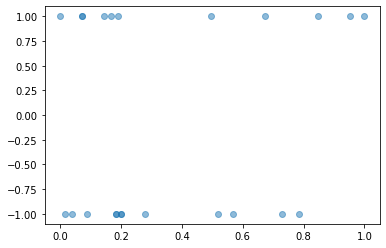

In [126]:
plt.scatter(copia_df3["A3"], copia_df3["class"], alpha= 0.5)
plt.show

---
#### a.3. Transformación de Datos

En este paso los datos se **convierten o consolidan** para que el resultado del modelado sea más *eficiente/efectivo*. 

Entre las técnicas de transformación de datos se encuentra
* el **suavizamiento**.
    * <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/12/Zoomed-Moving-Average-Transform.png" width="500">
* **construcción de características**.
![](https://docs.google.com/uc?export=download&id=1a4zaszYOY3Rc7YX5Ggo1gBykOz_nwnML)
* **agregación o resumen** de datos.
* **discretización**.
* **generalización**. 

Sin embargo, la mayoría de estas se pueden considerar como áreas independientes.

Las tareas que requieren supervisión humana son las técnicas clásicas de transformación de datos como: 
* la generación de informes
* nuevos atributos que agregan los existentes 
* generalización de conceptos, especialmente en atributos categóricos
    * ej. la sustitución de fechas completas por solo números de año.

#### Ejercicio: One-Hot Encoding

One-Hot Encoding es la transformación de variables nominales/categóricas en númericas. Esta transformación consiste en convertir cada valor $v_i$ de una variable $V$ ($v_i\in V$), en columnas. De tal suerte, que si la variable $V$ tiene tres valores ($|V|=3$), esta será reemplazada por V1, V2 y V3, en donde se pondrá un 1 si $V1 = v_i$, de otra forma 0; se aplica el mismo principio para V2 y V3.

![](https://docs.google.com/uc?export=download&id=18CttdKmICOmEvQ82JEJwQbdnxO3myjnU)

Por ejemplo, si tenemos ``df.A1=['red', 'red', 'green']``

Cada valor de A1 se representara por un vector de 0's y 1's. Esto es ``[1,0],[1,0],[0,1]``. 

Ahora, en lugar de tener ``df.A1``, tenemos ``df.A1_red,df.A1_ref``.

**Aplicar el One-Hot-Encoding a las variables A4 y A5 del conjunto de aprobación de crédito**.

In [127]:
procesado_df = pd.get_dummies(data=copia_df3, prefix= "_", columns=["A4", "A5"])

In [128]:
procesado_df

,A1,A2,A3,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class,__y,__p
9,b,42.5,0.167946,w,v,3.165,t,f,0,t,g,52,0.626957,1,1,1
15,b,36.67,0.071977,k,v,0.250,t,t,10,t,g,320,0.000000,1,1,1
74,b,44.83,0.568138,c,v,1.625,f,f,0,f,g,160,0.000870,-1,1,1
92,b,?,0.184261,aa,v,8.500,t,f,0,f,g,0,0.000000,-1,1,1
147,a,40.33,0.671785,q,h,8.000,t,t,14,f,g,0,1.000000,1,1,1
194,b,34.5,0.000000,i,bb,8.500,t,t,7,t,g,195,0.000000,1,1,1
195,b,28.25,0.191939,c,bb,1.500,t,t,8,t,g,144,0.003043,1,1,1
211,b,24.33,0.496161,d,v,5.500,t,f,0,t,s,100,0.000000,1,1,1
219,a,18.92,1.000000,c,v,1.000,t,t,4,t,g,80,0.217391,1,1,1
227,a,22.5,0.848369,x,v,2.460,f,f,0,f,g,164,0.000000,1,1,1


---
### a.4. Imputación de datos faltantes.

El propósito es llenar las variables que contienen **valores faltantes** (missing values en inglés) con algunos datos intuitivos. 

En la mayoría de los casos, es mejor agregar una estimación razonable de un valor de datos adecuado que dejarlo en blanco.

<img src="https://stefvanbuuren.name/fimd/fig/ch04-patterns-1.png" width="700">

Tomado de: https://stefvanbuuren.name/fimd/missing-data-pattern.html

In [129]:
import pandas as pd
import numpy as np

df = pd.read_csv(url)

df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


Insertaremos artificialmente 20% de datos faltantes, codificados como `np.nan`. Para ello utilizamos la función `sample()`, la cual nos permite obtener una muestra de un objeto con respecto a un eje del objeto, por defecto devuelve los renglones en un DataFrame.

In [109]:
import random
random.seed(3)
df_copy = df.copy()

for col in df_copy.columns:
    df_copy.loc[df_copy.sample(frac=0.2).index, col] = np.nan

df_copy.head(20)
# df_copy.dtypes

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,NaN,30.83,NaN,u,g,w,v,1.250,NaN,NaN,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,NaN,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.500,t,NaN,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,NaN,v,NaN,t,t,NaN,NaN,g,100,3.0,+
4,b,20.17,5.625,NaN,g,NaN,NaN,1.710,t,f,0.0,f,s,120,0.0,+
5,b,32.08,NaN,NaN,NaN,m,v,2.500,NaN,f,0.0,t,g,360,0.0,+
6,b,33.17,1.040,u,g,NaN,h,NaN,t,f,0.0,NaN,g,164,31285.0,+
7,a,NaN,11.585,NaN,g,cc,NaN,0.040,t,f,0.0,f,NaN,80,1349.0,+
8,b,54.42,0.500,NaN,NaN,NaN,NaN,3.960,t,f,0.0,f,g,NaN,314.0,+
9,b,NaN,4.915,y,p,NaN,v,NaN,t,f,NaN,t,g,NaN,1442.0,NaN


Para valores númericos podemos utilizar la media o mediana, `'mean'` y `'median'` respectivamente.

In [110]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

imp_mean.fit(df_copy.loc[:,['A3','A8']])
imp_median.fit(df_copy.loc[:,['A3','A8']])

# df_copy.loc[:,['A3','A8']] =imp_mean.transform(df_copy.loc[:,['A3','A8']])
df_copy.loc[:,['A3','A8']] =imp_median.transform(df_copy.loc[:,['A3','A8']])
df_copy.head(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,NaN,30.83,2.750,u,g,w,v,1.250,NaN,NaN,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,NaN,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.500,t,NaN,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,NaN,v,1.000,t,t,NaN,NaN,g,100,3.0,+
4,b,20.17,5.625,NaN,g,NaN,NaN,1.710,t,f,0.0,f,s,120,0.0,+
5,b,32.08,2.750,NaN,NaN,m,v,2.500,NaN,f,0.0,t,g,360,0.0,+
6,b,33.17,1.040,u,g,NaN,h,1.000,t,f,0.0,NaN,g,164,31285.0,+
7,a,NaN,11.585,NaN,g,cc,NaN,0.040,t,f,0.0,f,NaN,80,1349.0,+
8,b,54.42,0.500,NaN,NaN,NaN,NaN,3.960,t,f,0.0,f,g,NaN,314.0,+
9,b,NaN,4.915,y,p,NaN,v,1.000,t,f,NaN,t,g,NaN,1442.0,NaN


Y para valores categoricos podemos utilizar el valor más frecuente, estableciendo la estrategia `'most_frequent'`.

In [111]:
from sklearn.impute import SimpleImputer

imp_category = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp_category.fit(df_copy.loc[:,['A1','A4']])

df_copy.loc[:,['A1','A4']] =imp_category.transform(df_copy.loc[:,['A1','A4']])
df_copy.head(20)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,2.750,u,g,w,v,1.250,NaN,NaN,1.0,f,g,202,0.0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,NaN,6.0,f,g,43,560.0,+
2,a,24.5,0.500,u,g,q,h,1.500,t,NaN,0.0,f,g,280,824.0,+
3,b,27.83,1.540,u,g,NaN,v,1.000,t,t,NaN,NaN,g,100,3.0,+
4,b,20.17,5.625,u,g,NaN,NaN,1.710,t,f,0.0,f,s,120,0.0,+
5,b,32.08,2.750,u,NaN,m,v,2.500,NaN,f,0.0,t,g,360,0.0,+
6,b,33.17,1.040,u,g,NaN,h,1.000,t,f,0.0,NaN,g,164,31285.0,+
7,a,NaN,11.585,u,g,cc,NaN,0.040,t,f,0.0,f,NaN,80,1349.0,+
8,b,54.42,0.500,u,NaN,NaN,NaN,3.960,t,f,0.0,f,g,NaN,314.0,+
9,b,NaN,4.915,y,p,NaN,v,1.000,t,f,NaN,t,g,NaN,1442.0,NaN


---
### a.5. Integración de Datos.

Comprende la fusión de datos de múltiples fuentes de datos. 

Este proceso debe realizarse con cuidado para evitar redundancias e inconsistencias en el conjunto de datos resultante. 

Las operaciones típicas logradas dentro de la integración de datos son la 
* **identificación** y **unificación** de variables y dominios
* **análisis de correlación** entre atributos
* **identificación de duplicación** y **detección de conflictos** en los valores de datos de diferentes fuentes.

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_append2.png" width="700">

Una herramienta básica en este proceso son las tablas pivote o `pivot.table()`.
Una tabla pivote se usa para resumir, ordenar, reorganizar, agrupar, contar, datos totales o promedio almacenados en una tabla. Nos permite transformar columnas en filas y filas en columnas. Permite agrupar por cualquier campo (columna) y utilizar cálculos avanzados sobre ellos.

[Tabla Pivote de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)

#### Ejemplo

Dada la pandemia desencadenada por el COVID19, deseamos entender mejor la  propagación del virus. Los datos por país se pueden consultar en el repositorio de github [Datos Covid 19](https://datahub.io/core/covid-19#data). Sin embargo, para nuestro análisis requerimos enfocarnos en los **casos confirmados promedio por país**.

Para esto usemos la funcion `pivot.table()`.

In [145]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/MauricioRR-Tec/AprendizajeAutomatico/main/Tema_3_Preprocesamiento/data/Covid19/covid19WW_2021.csv'
df = pd.read_csv(url)

df1 = df.pivot_table(index=['Date','Country'], 
                    values='Confirmed',
                    aggfunc=np.mean)
df1

Confirmed
Date       Country                      
2020-01-22 Afghanistan                 0
           Albania                     0
           Algeria                     0
           Andorra                     0
           Angola                      0
...                                  ...
2021-03-16 Vietnam                  2560
           West Bank and Gaza     213791
           Yemen                    2969
           Zambia                  85240
           Zimbabwe                36535

[80640 rows x 1 columns]

#### Ejercicio:

Dada la pandemia desencadenada por el COVID19, deseamos entender mejor la  propagación del virus. Los datos por país se pueden consultar en el repositorio de github https://datahub.io/core/covid-19#data. Sin embargo, para nuestro análisis requerimos enfocarnos en los **casos confirmados acumulados por día y país**.

Para esto necesitamos en el eje $y$ (renglones) las fechas, y en el eje $x$ (columnas) los paises. **Realice las acciones de pivoteo necesarias para obtener el DataFrame requerido. La variable ``Date`` debe de ser de tipo fecha. Aseguresé de guardar los resultados en un archivo CSV para su posterior análisis.**

In [147]:
df.Date = pd.to_datetime(df.Date)
dataframeR = df.pivot_table(index='Date', columns='Country', values='Confirmed',aggfunc= np.sum)
dataframeR

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,55959,116123,115008,11199,21265,945,2185747,177104,29112,488042,238959,8658,129825,555222,3391,300146,801723,12370,6501,868,258324,142160,34098,11363380,192,275859,12305,142122,2420,15986,1264,40622,908854,5023,4274,879485,101292,2294617,3618,9329,...,507959,3173,3934,60080,333872,199004,18,8820,1526873,9334,3183704,87286,30873,9012,712527,570645,16328,984,13308,509,26679,170,7953,7759,240617,2850930,29347338,40544,1487497,422246,4261398,69074,80392,3,144786,2550,205652,2729,84240,36423
2021-03-13,55959,116821,115143,11228,21323,962,2192025,177899,29117,491065,239692,8658,130404,556236,3404,301328,805321,12370,6501,868,259004,142160,34098,11439558,192,277878,12350,142136,2441,16035,1305,40622,911884,5023,4288,885379,101349,2299082,3626,9329,...,512051,3173,3937,60088,336235,199854,18,8946,1528414,9429,3183704,87600,30873,9022,712527,570645,16401,984,13308,509,26927,178,7953,7769,241257,2866012,29400553,40544,1500873,424405,4267015,70133,80481,3,145379,2553,207436,2771,84474,36471
2021-03-14,55985,117474,115265,11266,21380,963,2195722,178385,29130,493568,240295,8658,131001,557395,3421,302323,808283,12370,6501,868,259389,142160,34098,11483370,199,278557,12372,142147,2461,16101,1325,40622,914595,5023,4309,891110,101378,2303144,3635,9329,...,516277,3315,3937,60105,337503,200374,18,9190,1529420,9490,3183704,87907,30873,9024,712527,570645,16478,985,13308,509,27005,196,8070,7783,241834,2879390,29438775,40581,1509983,426397,4271710,71691,80567,3,145379,2554,209304,2836,84797,36484


---
### a.6. Identificación de Datos Anómalos/Outliers.

El objetivo principal es detectar errores aleatorios o variaciones en una variable medida. Tenga en cuenta que nos referimos a este proceso como  **identificación** de ruido en lugar de la **eliminación** de ruido. 

<img src="https://pbs.twimg.com/media/DP9I5Y1WkAA6ZM9?format=jpg&name=900x900" width="400">

<img src="https://www.mdpi.com/energies/energies-12-03310/article_deploy/html/images/energies-12-03310-g002.png" width="600">

Una vez que se detecta un ejemplo ruidoso, podemos aplicar un proceso basado en la corrección que podría involucrar algún tipo de operación subyacente.

<img src="https://anomaly.io/wp-content/uploads/2017/01/correlation-anomaly-detected.png" width="800" align="middle">

---


### Otras actividades asociadas al PP: Reducción de Datos

La **reducción de datos** comprende el conjunto de técnicas que, de una forma u otra, obtienen una representación reducida de los datos originales.

El **objetivo** de la redución de los datos es ***encontrar un sub-conjunto $C'$ tal que se aproxime al conjunto original $C$ tal que la información contenida en $C' \approx C$***. Esto típicamente significa que se mantienen la estructura esencial de los datos originales ($C$), pero la cantidad de datos se reduce. 

![](https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v)
<!-- <img src="https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v" width="400" align="middle"> -->

Algo interesante, es que mientras el PP es fundamental, la reducción de datos puede considerarse como *opcional*. Sin embargo, existen muchas razones por las cuales este proceso es más que una sugerencia:

* Para su ejecución y de acuerdo a formulación, todos los algoritmos de ML estan sujetos a un 
  * **tiempo de computo específico** 
  * **memoria** específica.
  * **tamaño del conjunto de datos** 
  * etc.

  Entonces, si el tamaño del conjunto de datos es mayor al limite de un algoritmo, el tiempo de computo se volverá **prohibitivo**.  

<img src="https://upload.wikimedia.org/wikipedia/commons/0/09/Binary_search_vs_Linear_search_example_svg.svg" width="300" style="background-color:white;">

* Respecto a la **memoria** y **tamaño del conjunto de datos**, estos se encuentra relacionados a la **Maldición de la Dimensionalidad** (Curse of Dimensionality en inglés).
La maldición de la dimensionalidad es una familia de fenómenos relacionados a aquellos problemas descritos por muchas dimensiones, lo que no sucede en aquellos sistemas de pocas dimensiones. 

    * Alta Dimensionalidad
        * Definición: ***Espacio de Características*** (Feature Space en inglés); determina todo el posible conjunto de combinaciones (realistas o no) de los valores que tendrán las variables del problema.

        Ahora supongamos que queremos realizar una predicción usando solo una dimensión que esta acotada entre 0 y 1, $X^D \mid D=1,\ 0\leq x_1 \leq 1$. En este caso, podemos conocer $1/3$ de todos los posibles resultados conociendo una tercera parte de la variable $x_1$, como se observa en la siguiente figura  
![](https://docs.google.com/uc?export=download&id=1DCqkNuAH2Dc32HOz04aBBekn8nAk1zHH)
        
        Si ahora utilizamos dos variables, $X^D \mid D=2, 0\leq x_1,\ x_2 \leq 1$, y dividimos ambas en 3 partes, podemos dibujar un cuadrado que cubra $1/3$ de los valores de cada variable en 3 partes. Sin embargo, este cuadrado, no cubre $1/3$ parte de todas las combinaciones de $x_1 \text{ y } x_2$, en cambio, ¡solo cubre $1/9 \sim 11 \text{\%}$ 
![](https://docs.google.com/uc?export=download&id=18wZ8GWiQNYnZMGvIKyAvSqyT1dfDE_lK)

        Si añadimos una tercer variable y repetimos el mismo proceso, el cubo resultante solo cubrirá $1/27 \approx 4\text{\%}$ de todas las posibles combinaciones.        
![](https://docs.google.com/uc?export=download&id=1rBP3TXW2SjowCslJOEa9SN0RlOdwir90)

        De hecho
<!-- ![](https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L) -->
<img src="https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L" width="600" style="background-color:white;">

<!--Por ejemplo, si el objetivo es reducir el número de dimensiones el objetivo estaría dado por  
$C'^D \approx C^F \mid F>D $. -->
